In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from string import Template
import json
import sys 
sys.path.append('..')
# coEgoNetworks
import src.coegonets as cnets
import src.notebook as nb

In [5]:
STYLE='bmh'
plt.style.use(STYLE)
font = {'family' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)
mpl.rc('legend',fontsize=12)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
mpl.rc('axes',facecolor="white",labelsize=12)
# mpl.rc('text', usetex=True)
PLOT_WIDTH  = 14
PLOT_HEIGHT = 7

In [6]:
# load javascript for sigma JS 
HTML('''<script src="./sigma.min.js"></script>
<script src="./sigma.layout.forceAtlas2.min.js"></script>
<script src="./sigma.renderers.snapshot.min.js"></script>
<script src="./sigma.exporters.svg.min.js"></script>''')

In [29]:


TB = ["word1 word2 word3",
     "word1",
     "word2 word3",
     "word1 word3",
     "word1 word3",
     "word1 word2",
     "word1 word2",
     "word1 word4 word5",
     "word4",
     "word3 word2",
     "word7 word5",
     "word5 word3",
     "word4 word2",
     "word3 word2",
     "word1 word2 word3 word4 word5 word6",
    "word1 word2 word3 word4 word5 ",
    "word1 word2 word3 word5  word7",
    "word1 word2" ,     
    "word1 word2" ,
]

# T = ["word1 word2 word3 word4 word5 word6",
#     "word1 word2 word3 word4 word5 ",
#     "word1 word2 word3 word5  word7",
#     "word1 word2" ,     
#     "word1 word2" ,]

t = cnets.keyword_filter_all(TB, ["word1","word2","word3"])
# print(TB)
print(len(t))
print(t)
#build matrix
c, v = cnets.build_COOM(t)
C = cnets.getDF(C=c,V=v)
C

4
['word1 word2 word3', 'word1 word2 word3 word4 word5 word6', 'word1 word2 word3 word4 word5 ', 'word1 word2 word3 word5  word7']
 > processed 3\4 docs | 19 tokens
 > done


,[COUNTS],word1,word2,word3,word4,word5,word6,word7
[COUNTS],0,4,4,4,2,3,1,1
word1,4,0,4,4,2,3,1,1
word2,4,4,0,4,2,3,1,1
word3,4,4,4,0,2,3,1,1
word4,2,2,2,2,0,2,1,0
word5,3,3,3,3,2,0,1,1
word6,1,1,1,1,1,1,0,0
word7,1,1,1,1,0,1,0,0


Text(0.5, 0.98, 'Top 3 Hashtag Frequency')

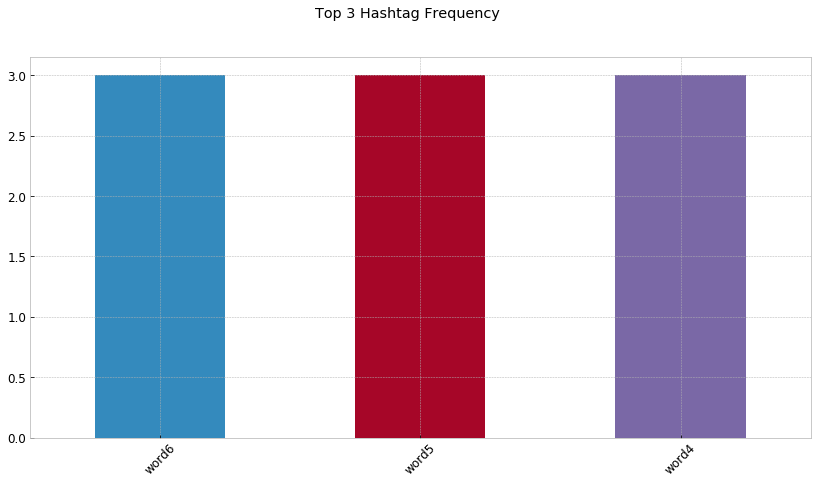

In [21]:
#top K occurrences
K=3
oc = nb.top_k(C, K)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
oc.plot(ax=ax,kind="bar", rot=45)
f.suptitle("Top {} Hashtag Frequency".format(K))

Text(0.5, 0.98, 'word1: top 3 coocurrences')

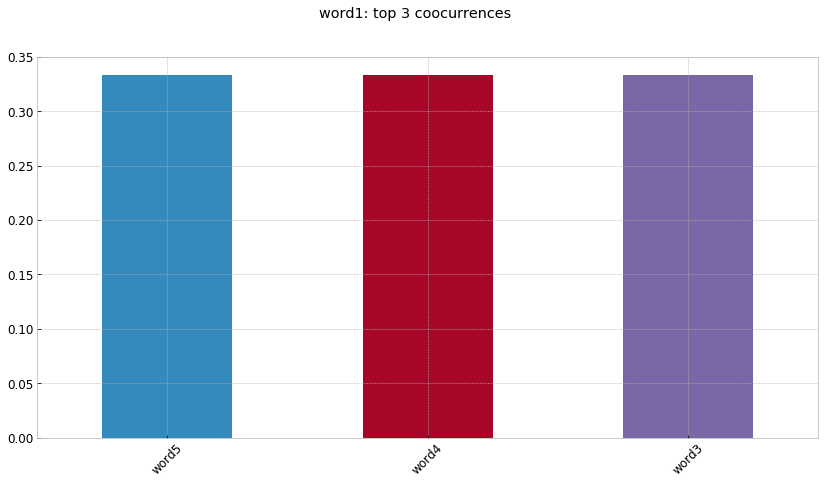

In [22]:
#top K co-occurrences
target_word = "word1"
cooc = nb.top_k_cooc(C,target_word,K, True)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
cooc.plot(ax=ax,kind="bar", rot=45)
f.suptitle("{}: top {} coocurrences".format(target_word, K))

In [10]:
#plot top co-occurrences
top_words = list(cooc.keys())
graph = nb.sigmaJSGraph(C, top_words, style=STYLE) 
HTML(graph) 

TypeError: sigmaJSGraph() got an unexpected keyword argument 'style'